In [91]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

In [92]:
b_tuple1 = uproot.open('tuples/2500_3_dtf.root:B/Tuple')
b_tuple2 = uproot.open('tuples/3500_3_dtf.root:B/Tuple')
h_mass=b_tuple1["H_MASS"].array()
h_mass2=b_tuple2["H_MASS"].array()

In [93]:
def gaussian(x, amp, mu, sigma):
    return amp * norm.pdf(x, mu, sigma)

In [94]:
#plt.hist(h_mass, bins='auto', range=[0,5600])  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
#plt.show()

Gaussian Fit Equation:
y = 111645.24 * exp(- (x - 2486.29)^2 / (2 * 154.98^2))
Fitted parameters:
Amplitude (amp) = 111645.24
Mean (mu) = 2486.29
Standard Deviation (sigma) = 154.98
R^2 = 0.934


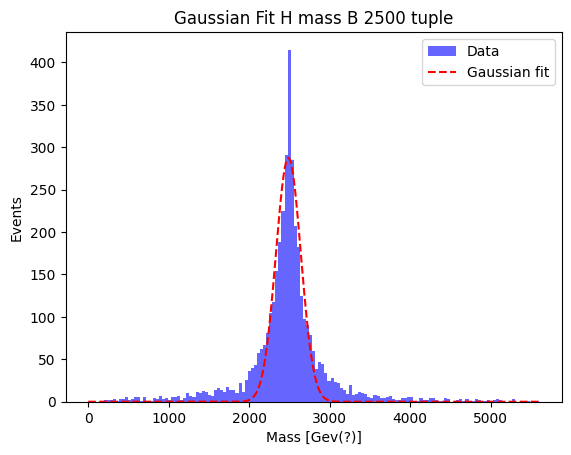

In [95]:
hist, bin_edges = np.histogram(h_mass, bins='auto')
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Initial guess for the parameters
initial_guess = [max(hist), np.mean(h_mass), np.std(h_mass)]

# Fit the Gaussian function to the histogram data
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
amp, mu, sigma = popt

# Calculate R^2 value
residuals = hist - gaussian(bin_centers, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist - np.mean(hist))**2)
r_squared = 1 - (ss_res / ss_tot)

# Output the fit equation and parameters
fit_eq = (
    f"Gaussian Fit Equation:\n"
    f"y = {amp:.2f} * exp(- (x - {mu:.2f})^2 / (2 * {sigma:.2f}^2))\n"
    f"Fitted parameters:\n"
    f"Amplitude (amp) = {amp:.2f}\n"
    f"Mean (mu) = {mu:.2f}\n"
    f"Standard Deviation (sigma) = {sigma:.2f}\n"
    f"R^2 = {r_squared:.3f}"
)
print(fit_eq)

# Plot the histogram
plt.hist(h_mass, bins='auto', range=[0, 5600], alpha=0.6, color='b', label='Data')

# Plot the fitted Gaussian curve
x_fit = np.linspace(0, 5600, 1000)
y_fit = gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r--', label='Gaussian fit')

# Add title and labels
plt.title("Gaussian Fit H mass B 2500 tuple")
plt.xlabel("Mass [Gev(?)]")
plt.ylabel("Events")
plt.legend()

# Show the plot
plt.show()

Gaussian Fit Equation:
y = 197255.87 * exp(- (x - 3481.10)^2 / (2 * 253.72^2))
Fitted parameters:
Amplitude (amp) = 197255.87
Mean (mu) = 3481.10
Standard Deviation (sigma) = 253.72
R^2 = 0.939


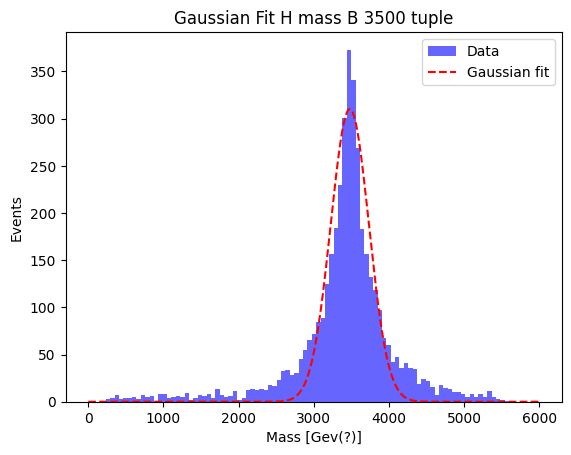

In [96]:
hist, bin_edges = np.histogram(h_mass2, bins='auto')
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Initial guess for the parameters
initial_guess = [max(hist), np.mean(h_mass2), np.std(h_mass2)]

# Fit the Gaussian function to the histogram data
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
amp, mu, sigma = popt

# Calculate R^2 value
residuals = hist - gaussian(bin_centers, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist - np.mean(hist))**2)
r_squared = 1 - (ss_res / ss_tot)

# Output the fit equation and parameters
fit_eq = (
    f"Gaussian Fit Equation:\n"
    f"y = {amp:.2f} * exp(- (x - {mu:.2f})^2 / (2 * {sigma:.2f}^2))\n"
    f"Fitted parameters:\n"
    f"Amplitude (amp) = {amp:.2f}\n"
    f"Mean (mu) = {mu:.2f}\n"
    f"Standard Deviation (sigma) = {sigma:.2f}\n"
    f"R^2 = {r_squared:.3f}"
)
print(fit_eq)

# Plot the histogram
plt.hist(h_mass2, bins='auto',range=[0, 5600],  alpha=0.6, color='b', label='Data')

# Plot the fitted Gaussian curve
x_fit = np.linspace(0, 6000, 1000)
y_fit = gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r--', label='Gaussian fit')

# Add title and labels
plt.title("Gaussian Fit H mass B 3500 tuple")
plt.xlabel("Mass [Gev(?)]")
plt.ylabel("Events")
plt.legend()

# Show the plot
plt.show()

Double Gaussian Fit Equation:
y = 101635.65 * exp(- (x - 2478.33)^2 / (2 * 247.70^2)) + 24709.54 * exp(- (x - 2494.09)^2 / (2 * 44.63^2))
Fitted parameters:
Amplitude 1 (amp1) = 101635.65
Mean 1 (mu1) = 2478.33
Standard Deviation 1 (sigma1) = 247.70
Amplitude 2 (amp2) = 24709.54
Mean 2 (mu2) = 2494.09
Standard Deviation 2 (sigma2) = 44.63
R^2 = 0.978


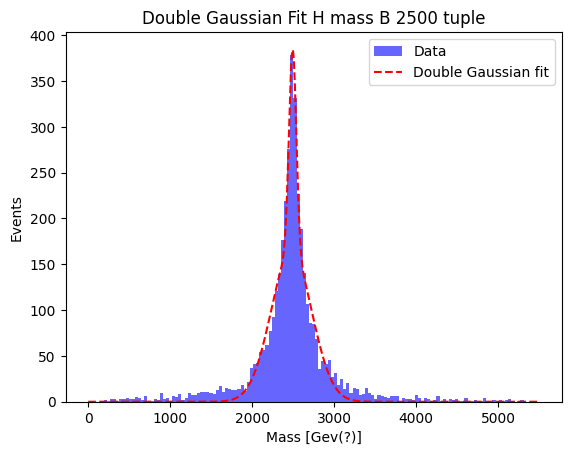

In [98]:
def double_gaussian(x, amp1, mu1, sigma1, amp2, mu2, sigma2):
    return (amp1 * norm.pdf(x, mu1, sigma1)) + (amp2 * norm.pdf(x, mu2, sigma2))

# Create the histogram
hist, bin_edges = np.histogram(h_mass, bins='auto', range=[0, 5600])
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Initial guess for the parameters
initial_guess = [
    max(hist), np.mean(h_mass) - 100, np.std(h_mass),  # First Gaussian parameters
    max(hist) / 2, np.mean(h_mass) + 100, np.std(h_mass) / 2  # Second Gaussian parameters
]

# Fit the double Gaussian function to the histogram data
popt, pcov = curve_fit(double_gaussian, bin_centers, hist, p0=initial_guess)
amp1, mu1, sigma1, amp2, mu2, sigma2 = popt

# Calculate R^2 value
residuals = hist - double_gaussian(bin_centers, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist - np.mean(hist))**2)
r_squared = 1 - (ss_res / ss_tot)

# Output the fit equation and parameters
fit_eq = (
    f"Double Gaussian Fit Equation:\n"
    f"y = {amp1:.2f} * exp(- (x - {mu1:.2f})^2 / (2 * {sigma1:.2f}^2)) + "
    f"{amp2:.2f} * exp(- (x - {mu2:.2f})^2 / (2 * {sigma2:.2f}^2))\n"
    f"Fitted parameters:\n"
    f"Amplitude 1 (amp1) = {amp1:.2f}\n"
    f"Mean 1 (mu1) = {mu1:.2f}\n"
    f"Standard Deviation 1 (sigma1) = {sigma1:.2f}\n"
    f"Amplitude 2 (amp2) = {amp2:.2f}\n"
    f"Mean 2 (mu2) = {mu2:.2f}\n"
    f"Standard Deviation 2 (sigma2) = {sigma2:.2f}\n"
    f"R^2 = {r_squared:.3f}"
)
print(fit_eq)

# Plot the histogram
plt.hist(h_mass, bins='auto', alpha=0.6, color='b', range=[0,5500], label='Data')

# Plot the fitted double Gaussian curve
x_fit = np.linspace(0, 5500, 1000)
y_fit = double_gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r--', label='Double Gaussian fit')

# Add title and labels
plt.title("Double Gaussian Fit H mass B 2500 tuple")
plt.xlabel("Mass [Gev(?)]")
plt.ylabel("Events")
plt.legend()

# Show the plot
plt.show()